In [1]:
import pandas as pd
import numpy as np

In [2]:
all_data = pd.read_csv('/home/daniil/Загрузки/forest_dataset.csv')
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [20]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values
feature_matrix.shape

(10000, 54)

In [4]:
from sklearn.model_selection import train_test_split
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)
accuracy = accuracy_score(test_labels, y_pred)
print("Classification accuracy:", accuracy)

Точность классификации: 0.7595


In [7]:
from sklearn.model_selection import GridSearchCV
params = { "n_neighbors": [1,2,3,4,5,6,7,8,9,10], 
          "metric": ['manhattan', 'euclidean'],
            "weights": ['uniform', 'distance']}
clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
clf_grid.fit(train_feature_matrix, train_labels)
y_pred_grid = clf_grid.predict(test_feature_matrix)
accuracy_grid = accuracy_score(test_labels, y_pred_grid)
print("Classification accuracy after parameter selection:", accuracy_grid)

Точность классификации после подбора параметров: 0.785


In [13]:
pred_prob = clf_grid.predict_proba(test_feature_matrix)
pred_prob

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73117861, 0.26882139, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27814042, 0.72185958, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.54264548, 0.        , 0.        , ..., 0.        , 0.        ,
        0.45735452]])

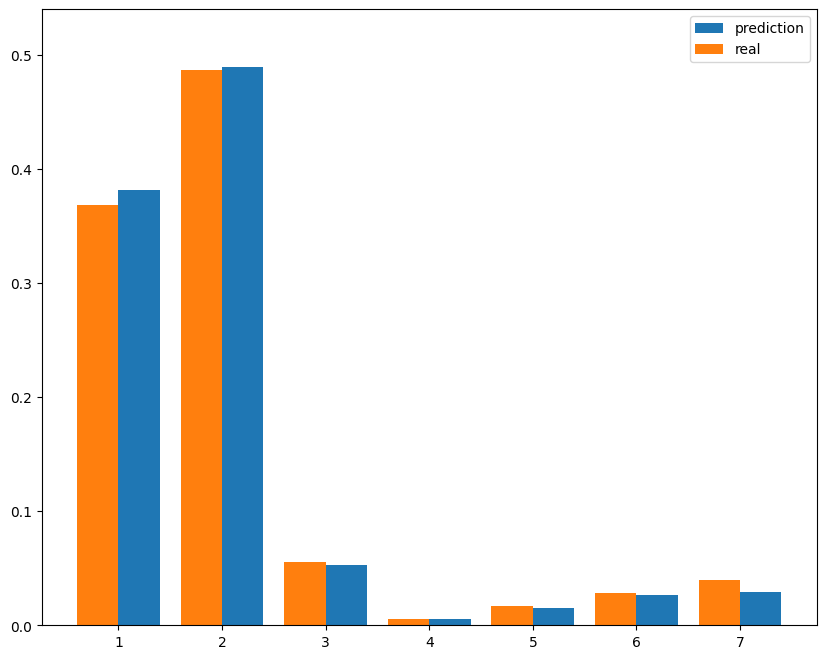

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

In [41]:
class_names = {
    0: "pine tree",
    1: "Fir",
    2: "Birch tree",
    3: "Poplar",
    4: "Oak",
    5: "Maple"
}
def predict_tree(features):
    
    if len(features) != 54:
        return "Error: It is necessary to enter exactly 54 signs."
    
    features_array = np.array(features).reshape(1, -1)
    class_index = clf_grid.predict(features_array)[0]
    class_predicted = class_names.get(class_index, "Unknown class") 

    return class_predicted
# Пример ввода признаков (здесь используются случайные значения для демонстрации)
example_features = [np.random.random() for _ in range(54)]
predicted_class = predict_tree(example_features)
print("Predicted tree class:", predicted_class)

Predicted tree class: Poplar
